# Génération de mélodie de façon aléatoire

In [1]:
import music21 as m21
import random

### Génération aléatoire basique
Génération de mélodies aléatoires en do majeur et en 4|4 avec seulement 7 notes et des silences.

In [2]:
NOTE_DURATIONS = [
    0.25,
    0.5,
    0.75,
    1,
    1.5,
    2,
    3,
    4
]

NOTES = ['C','D','E','F','G','A','B']

In [13]:
from music21 import note, stream

# Générer une mélodie d'une durée spécifiée
def generate_random_melody(total_duration=16, silence_probability=0.2):
    melody = stream.Stream()
    current_duration = 0  # Temps total actuel
    
    while current_duration < total_duration:
        duration = random.choice(NOTE_DURATIONS)  # Choix d'une durée aléatoire

        # Empêcher de dépasser la durée totale
        if current_duration + duration > total_duration:
            duration = total_duration - current_duration  # Ajuste pour finir pile

        if random.random() < silence_probability:  # Probabilité d'ajouter un silence
            element = note.Rest(quarterLength=duration)  # Créer un silence
        else:
            pitch = random.choice(NOTES)  # Note aléatoire
            element = note.Note(pitch, quarterLength=duration)  # Créer une note
        
        melody.append(element)  # Ajouter à la mélodie
        current_duration += duration  # Mettre à jour la durée actuelle
    
    return melody


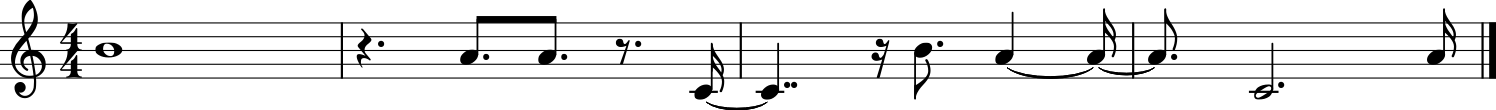

In [14]:
melody = generate_random_melody()
melody.show()

In [15]:
melody.show('midi')

In [16]:
melody.write("midi", "random.mid")

'random.mid'

## Génération aléatoire avec un choix de notes

Génération de mélodie aléatoire avec les # en plus.

In [6]:
NOTES_ALL = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

In [7]:
def random_melody_with_notes(total_duration=16, silence_probability=0.1, notes=NOTES_ALL):
    melody = stream.Stream()
    current_duration = 0  # Temps total actuel
    
    while current_duration < total_duration:
        duration = random.choice(NOTE_DURATIONS)  # Choix d'une durée aléatoire

        # Empêcher de dépasser la durée totale
        if current_duration + duration > total_duration:
            duration = total_duration - current_duration  # Ajuste pour finir pile

        if random.random() < silence_probability:  # Probabilité d'ajouter un silence
            element = note.Rest(quarterLength=duration)  # Créer un silence
        else:
            pitch = random.choice(notes)  # Note aléatoire
            element = note.Note(pitch, quarterLength=duration)  # Créer une note
        
        melody.append(element)  # Ajouter à la mélodie
        current_duration += duration  # Mettre à jour la durée actuelle
    
    return melody
    

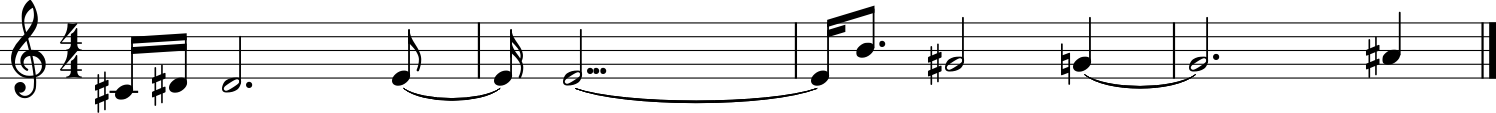

In [8]:
melody = random_melody_with_notes(notes=NOTES_ALL)
melody.show()

In [9]:
melody.show('midi')

Exemple de génération de mélodies avec des accords

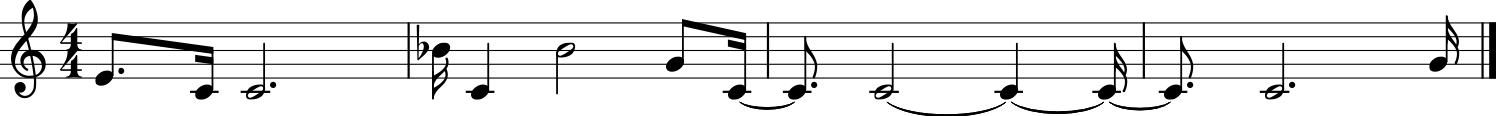

In [10]:
# Choix de l'accord
CHORD = ['C','E','G','Bb']

# Génération 
melody = random_melody_with_notes(silence_probability=0.05,notes=CHORD)
melody.show()

In [11]:
melody.show('midi')

In [12]:
melody.write('midi', fp='random_with_chords.mid')

'random_with_chords.mid'